In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as stats

In [15]:
#import and clean the alzheimers mortality data
alz_df_og = pd.read_csv('resources/alz_mortality.csv')
year_mask = ((alz_df_og['YEAR'] >= 2015) & (alz_df_og['YEAR'] <= 2020))
alz_df = alz_df_og.loc[year_mask,['YEAR', 'STATE','RATE']].sort_values(['STATE', 'YEAR']).reset_index(drop=True)
alz_df = alz_df.rename(columns={
    'YEAR': 'Year',
    'STATE' : 'State',
    'RATE' : 'Mortality Rate'
})
alz_state_df = alz_df.set_index('State', drop=True)
alz_state_df.head(30)

,Year,Mortality Rate
State,,
AK,2015,16.7
AK,2016,25.8
AK,2017,22.1
AK,2018,27.5
AK,2019,25.3
AK,2020,26.8
AL,2015,41.8
AL,2016,45.0
AL,2017,45.2


In [18]:
alz_df_og.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2020,AL,50.8,3093,/nchs/pressroom/states/alabama/al.htm
1,2020,AK,26.8,139,/nchs/pressroom/states/alaska/ak.htm
2,2020,AZ,32.7,3238,/nchs/pressroom/states/arizona/az.htm
3,2020,AR,45.6,1782,/nchs/pressroom/states/arkansas/ar.htm
4,2020,CA,40.6,18775,/nchs/pressroom/states/california/ca.htm


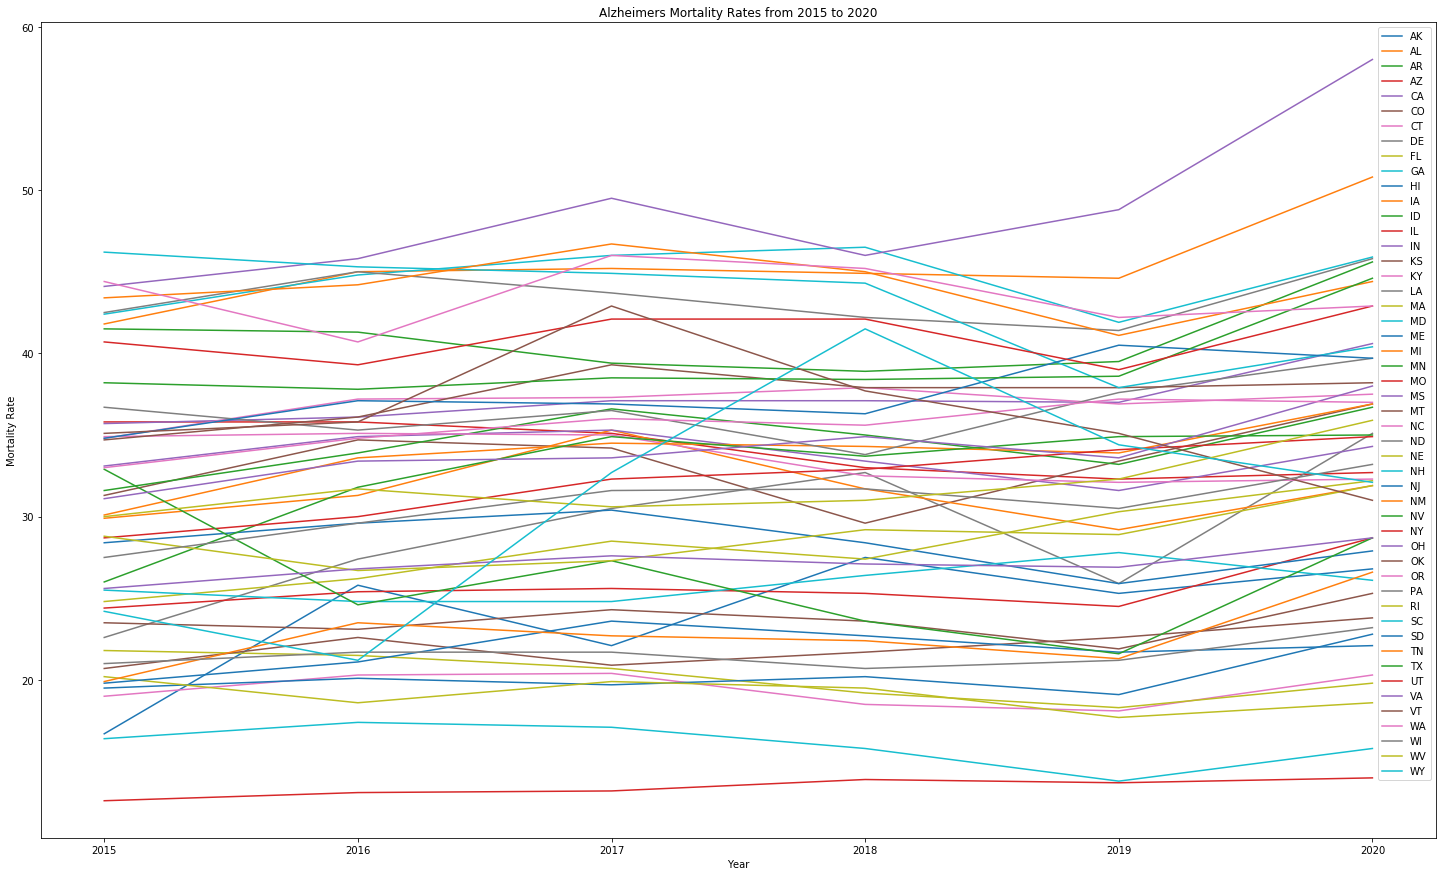

In [3]:
#plot each states mortality rate over the past few years
state_list = alz_state_df.index.drop_duplicates().tolist()
mortality_list = []
plt.figure(figsize=(25,15))
plt.ylabel('Mortality Rate')
plt.xlabel('Year')
plt.title('Alzheimers Mortality Rates from 2015 to 2020')
for state in state_list:
    temp_df = alz_state_df.loc[state,:]
    plt.plot(temp_df['Year'],temp_df['Mortality Rate'],label = state)
    mortality_sub = temp_df['Mortality Rate'].tolist()
    mortality_list.append(mortality_sub)
plt.legend()
plt.show()

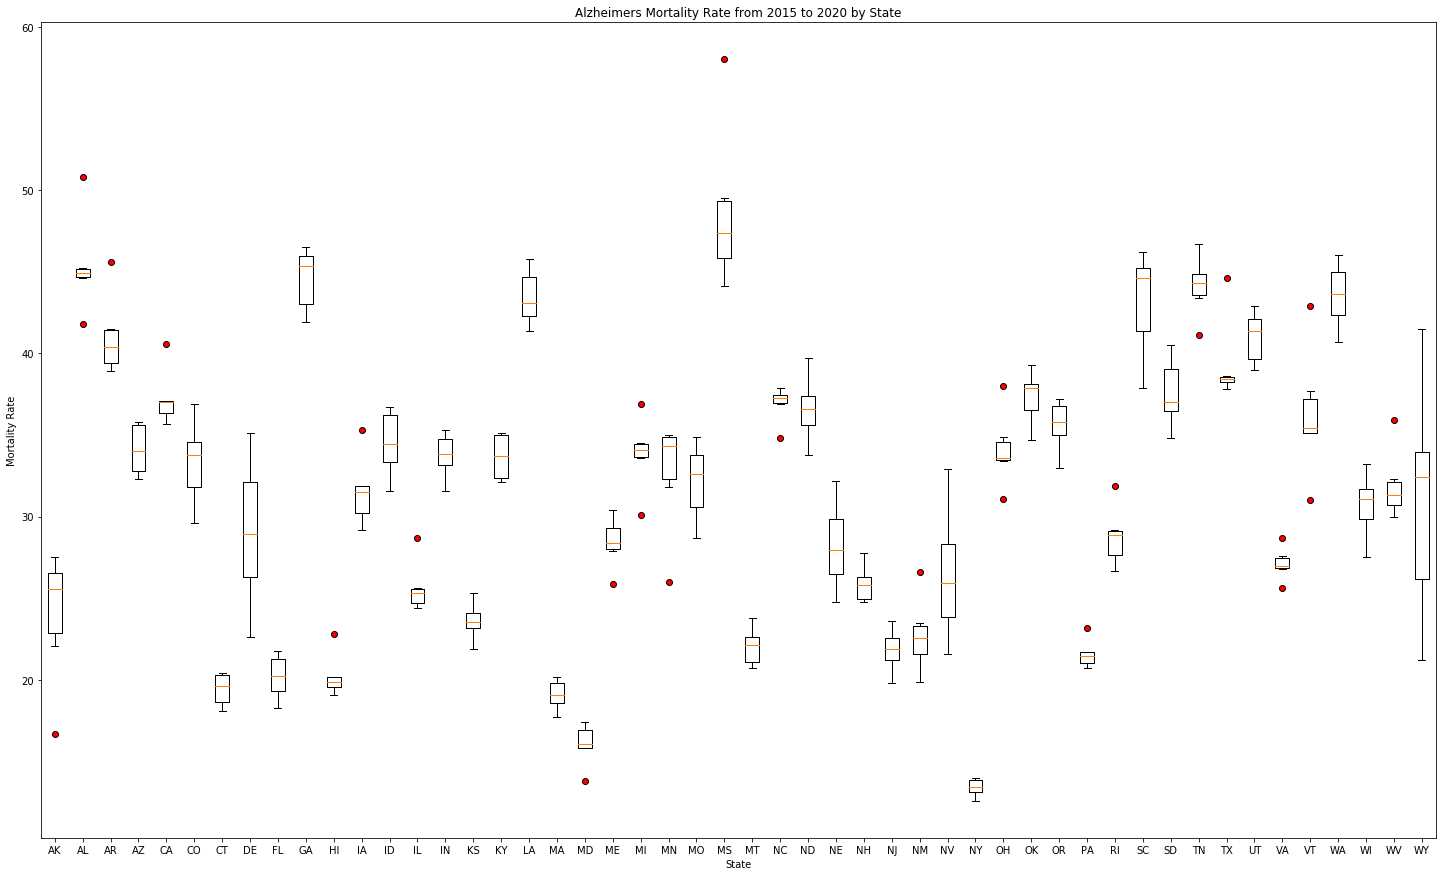

In [4]:
plt.figure(figsize=(25,15))
plt.ylabel('Mortality Rate')
plt.xlabel('State')
plt.title('Alzheimers Mortality Rate from 2015 to 2020 by State')
plt.boxplot(mortality_list, labels=state_list,flierprops={'markerfacecolor':'red'})
plt.show()

## Hypothesis: Different areas affect alzheimers mortality

In [5]:
regions_basic = pd.read_csv('resources/state_regions.csv')
regions_basic = regions_basic.loc[:,['State','State Code','Region']]
regions_basic

,State,State Code,Region
0,Alaska,AK,West
1,Alabama,AL,South
2,Arkansas,AR,South
3,Arizona,AZ,West
4,California,CA,West
5,Colorado,CO,West
6,Connecticut,CT,Northeast
7,District of Columbia,DC,South
8,Delaware,DE,South
9,Florida,FL,South


In [17]:
#reset index of original alz dataframe so state abbrev is a column rather than the index
alz_state_reset = alz_state_df.reset_index()
#drop state full name in regions dataframe and rename state code column for merge
regions_for_merge = regions_basic.loc[:,['State Code','Region']].rename(columns={'State Code':'State'})
regions_for_merge.head()
alz_state_reset.head()

,State,Year,Mortality Rate
0,AK,2015,16.7
1,AK,2016,25.8
2,AK,2017,22.1
3,AK,2018,27.5
4,AK,2019,25.3


In [7]:
regions_alz_merged = alz_state_reset.merge(regions_for_merge)
regions_alz_merged

,State,Year,Mortality Rate,Region
0,AK,2015,16.7,West
1,AK,2016,25.8,West
2,AK,2017,22.1,West
3,AK,2018,27.5,West
4,AK,2019,25.3,West
...,...,...,...,...
295,WY,2016,21.2,West
296,WY,2017,32.7,West
297,WY,2018,41.5,West
298,WY,2019,34.4,West


In [8]:
grouped_regions_alz = regions_alz_merged.groupby(['Region','Year']).agg({'Mortality Rate':'mean'})
grouped_regions_alz

Mortality Rate
Region    Year                
Midwest   2015       29.216667
          2016       30.975000
          2017       32.441667
          2018       31.583333
          2019       31.883333
          2020       34.150000
Northeast 2015       23.377778
          2016       23.522222
          2017       24.911111
          2018       24.111111
          2019       23.344444
          2020       23.900000
South     2015       35.056250
          2016       36.400000
          2017       37.000000
          2018       36.268750
          2019       34.868750
          2020       38.675000
West      2015       29.723077
          2016       30.238462
          2017       31.730769
          2018       31.884615
          2019       30.661538
          2020       33.115385

In [9]:
reset_index_for_boxplot = grouped_regions_alz.reset_index()
regions = reset_index_for_boxplot.Region.unique()
reset_index_for_boxplot.head()

,Region,Year,Mortality Rate
0,Midwest,2015,29.216667
1,Midwest,2016,30.975000
2,Midwest,2017,32.441667
3,Midwest,2018,31.583333
4,Midwest,2019,31.883333


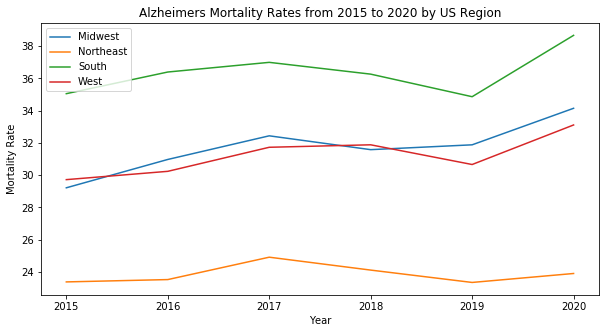

In [20]:
regions_list_mortality = []
plt.figure(figsize=(10,5))
plt.ylabel('Mortality Rate')
plt.xlabel('Year')
plt.title('Alzheimers Mortality Rates from 2015 to 2020 by US Region')
for region in regions:
    temp_df = reset_index_for_boxplot.loc[(reset_index_for_boxplot['Region']== region),:]
    plt.plot(temp_df['Year'],temp_df['Mortality Rate'],label = region)
    ind_region_mortalities = temp_df['Mortality Rate'].tolist()
    regions_list_mortality.append(ind_region_mortalities)
plt.legend()
plt.show()

In [11]:
regions_list_mortality

[[29.21666666666667,
  30.974999999999998,
  32.44166666666667,
  31.58333333333333,
  31.883333333333336,
  34.15],
 [23.37777777777778,
  23.522222222222222,
  24.91111111111111,
  24.11111111111111,
  23.344444444444445,
  23.9],
 [35.05625, 36.4, 37.0, 36.26875, 34.86875, 38.675],
 [29.72307692307692,
  30.238461538461536,
  31.73076923076923,
  31.884615384615383,
  30.66153846153846,
  33.11538461538461]]

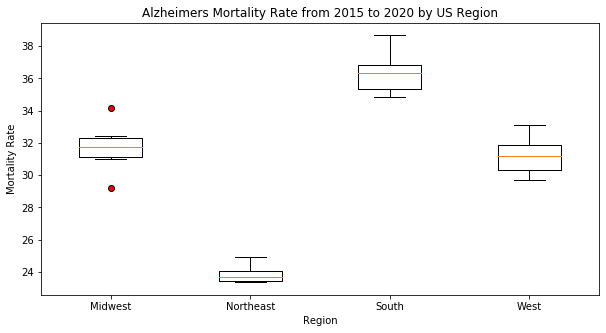

In [21]:
plt.figure(figsize=(10,5))
plt.ylabel('Mortality Rate')
plt.xlabel('Region')
plt.title('Alzheimers Mortality Rate from 2015 to 2020 by US Region')
plt.boxplot(regions_list_mortality, labels=regions,flierprops={'markerfacecolor':'red'})
plt.show()

In [13]:
# Annova Test
# Extract individual groups
group_midwest = reset_index_for_boxplot[reset_index_for_boxplot["Region"] == regions[0]]["Mortality Rate"]
group_northeast = reset_index_for_boxplot[reset_index_for_boxplot["Region"] == regions[1]]["Mortality Rate"]
group_south = reset_index_for_boxplot[reset_index_for_boxplot["Region"] == regions[2]]["Mortality Rate"]
group_west = reset_index_for_boxplot[reset_index_for_boxplot["Region"] == regions[3]]["Mortality Rate"]

In [14]:
stats.f_oneway(group_midwest, group_northeast, group_south, group_west)

F_onewayResult(statistic=98.53519843873865, pvalue=3.751325589485411e-12)